# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

(Please insert the background here )


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [13]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [14]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="mapping" content="A" />\n<base href="https://www.exchange-rates.org/" />\n'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [15]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [16]:
print(soup.prettify()[:1045])

<!DOCTYPE html>
<!--[if lt IE 9]>
    <html class="no-js ie8 oldie" lang='en' xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="C#" name="CODE_LANGUAGE">
   <meta content="JavaScript" name="vs_defaultClientScript"/>
   <meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema"/>
   <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
    <meta content="A" name="mapping"/>
    <base href="https://www.exchange-rates.org/"/>
    <link href="https://ajax.googleapis.com/" rel="dns-prefetch"/>
    <link href="https://www.google-analytics.com/" rel="dns-prefetch"/>
    <link as="image" href="https://dol8qrceshfrq.cloudfront.ne

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [17]:
table = soup.find('table',
                  attrs={'class':"table table-striped table-hover table-hover-solid-row table-simple history-data"})
print(table.prettify()[1:500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    7/9/2021
   </td>
   <td>
    Friday
   </td>
   <td>
    <a href="/Rate/USD/IDR/7-9-2021">
     14,499.31330
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/7-9-2021">
     USD IDR rate for 7/9/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>
    7/8/2021
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/7


In [18]:
tr = table.find_all('tr', attrs={'class':""})
tr

[<tr><td>7/9/2021</td><td>Friday</td><td><a href="/Rate/USD/IDR/7-9-2021">14,499.31330</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-9-2021">USD IDR rate for 7/9/2021</a></td></tr>,
 <tr><td>7/8/2021</td><td>Thursday</td><td><a href="/Rate/USD/IDR/7-8-2021">14,515.87714</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-8-2021">USD IDR rate for 7/8/2021</a></td></tr>,
 <tr><td>7/7/2021</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/7-7-2021">14,503.93654</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-7-2021">USD IDR rate for 7/7/2021</a></td></tr>,
 <tr><td>7/6/2021</td><td>Tuesday</td><td><a href="/Rate/USD/IDR/7-6-2021">14,469.58258</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-6-2021">USD IDR rate for 7/6/2021</a></td></tr>,
 <tr><td>7/5/2021</td><td>Monday</td><td><a href="/Rate/USD/IDR/7-5-2021">14,493.33968</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rat

Do the scrapping process here (please change this markdown with your explanation)

In [19]:
tr

[<tr><td>7/9/2021</td><td>Friday</td><td><a href="/Rate/USD/IDR/7-9-2021">14,499.31330</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-9-2021">USD IDR rate for 7/9/2021</a></td></tr>,
 <tr><td>7/8/2021</td><td>Thursday</td><td><a href="/Rate/USD/IDR/7-8-2021">14,515.87714</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-8-2021">USD IDR rate for 7/8/2021</a></td></tr>,
 <tr><td>7/7/2021</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/7-7-2021">14,503.93654</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-7-2021">USD IDR rate for 7/7/2021</a></td></tr>,
 <tr><td>7/6/2021</td><td>Tuesday</td><td><a href="/Rate/USD/IDR/7-6-2021">14,469.58258</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-6-2021">USD IDR rate for 7/6/2021</a></td></tr>,
 <tr><td>7/5/2021</td><td>Monday</td><td><a href="/Rate/USD/IDR/7-5-2021">14,493.33968</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rat

In [20]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr',attrs={'class':""})[i]
    
    #get tanggal
    date = row.find_all('td')[0].text
    date = date.strip()
    
    #get hari
    day = row.find_all('td')[1].text
    day = day.strip()
    
    #get nilai uang
    value = row.find_all('td')[2].text
    value = value.strip()
    
    #get tulisan
    note = row.find_all('td')[3].text
    note = note.strip()
    
    temp.append((date, day, value, note))
    
temp

[('7/8/2021', 'Thursday', '14,515.87714 IDR', 'USD IDR rate for 7/8/2021'),
 ('7/7/2021', 'Wednesday', '14,503.93654 IDR', 'USD IDR rate for 7/7/2021'),
 ('7/6/2021', 'Tuesday', '14,469.58258 IDR', 'USD IDR rate for 7/6/2021'),
 ('7/5/2021', 'Monday', '14,493.33968 IDR', 'USD IDR rate for 7/5/2021'),
 ('7/2/2021', 'Friday', '14,497.65100 IDR', 'USD IDR rate for 7/2/2021'),
 ('7/1/2021', 'Thursday', '13,270.37815 IDR', 'USD IDR rate for 7/1/2021'),
 ('6/30/2021', 'Wednesday', '14,491.89811 IDR', 'USD IDR rate for 6/30/2021'),
 ('6/29/2021', 'Tuesday', '13,215.84052 IDR', 'USD IDR rate for 6/29/2021'),
 ('6/28/2021', 'Monday', '14,439.22236 IDR', 'USD IDR rate for 6/28/2021'),
 ('6/25/2021', 'Friday', '14,426.82283 IDR', 'USD IDR rate for 6/25/2021'),
 ('6/24/2021', 'Thursday', '14,436.21247 IDR', 'USD IDR rate for 6/24/2021'),
 ('6/23/2021', 'Wednesday', '14,440.32729 IDR', 'USD IDR rate for 6/23/2021'),
 ('6/22/2021', 'Tuesday', '14,396.08712 IDR', 'USD IDR rate for 6/22/2021'),
 ('6/2

In [21]:
temp = temp [::-1]
temp

[('1/11/2021', 'Monday', '14,137.24151 IDR', 'USD IDR rate for 1/11/2021'),
 ('1/12/2021', 'Tuesday', '14,074.81444 IDR', 'USD IDR rate for 1/12/2021'),
 ('1/13/2021', 'Wednesday', '14,125.90174 IDR', 'USD IDR rate for 1/13/2021'),
 ('1/14/2021', 'Thursday', '14,070.58746 IDR', 'USD IDR rate for 1/14/2021'),
 ('1/15/2021', 'Friday', '14,153.46654 IDR', 'USD IDR rate for 1/15/2021'),
 ('1/18/2021', 'Monday', '14,055.43768 IDR', 'USD IDR rate for 1/18/2021'),
 ('1/19/2021', 'Tuesday', '14,063.60877 IDR', 'USD IDR rate for 1/19/2021'),
 ('1/20/2021', 'Wednesday', '14,021.43046 IDR', 'USD IDR rate for 1/20/2021'),
 ('1/21/2021', 'Thursday', '13,964.91920 IDR', 'USD IDR rate for 1/21/2021'),
 ('1/22/2021', 'Friday', '14,025.60268 IDR', 'USD IDR rate for 1/22/2021'),
 ('1/25/2021', 'Monday', '14,021.11609 IDR', 'USD IDR rate for 1/25/2021'),
 ('1/26/2021', 'Tuesday', '14,062.91108 IDR', 'USD IDR rate for 1/26/2021'),
 ('1/27/2021', 'Wednesday', '14,048.72649 IDR', 'USD IDR rate for 1/27/2021

## Creating data frame & Data wrangling

Put the array into dataframe

In [22]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('date', 'day', 'value', 'note'))
df['value'] = df['value'].replace('IDR',"",regex=True).replace(',',"",regex=True)
df['value'] = df['value'].astype('float64')
df.head()

,date,day,value,note
0,1/11/2021,Monday,14137.24151,USD IDR rate for 1/11/2021
1,1/12/2021,Tuesday,14074.81444,USD IDR rate for 1/12/2021
2,1/13/2021,Wednesday,14125.90174,USD IDR rate for 1/13/2021
3,1/14/2021,Thursday,14070.58746,USD IDR rate for 1/14/2021
4,1/15/2021,Friday,14153.46654,USD IDR rate for 1/15/2021


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [23]:
exchange = df[['value']].set_index(df.date)
exchange.head()

,value
date,
1/11/2021,14137.24151
1/12/2021,14074.81444
1/13/2021,14125.90174
1/14/2021,14070.58746
1/15/2021,14153.46654


Text(0, 0.5, 'IDR')

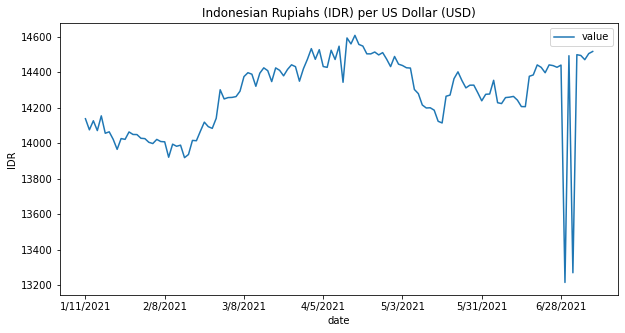

In [24]:
exchange.plot(title='Indonesian Rupiahs (IDR) per US Dollar (USD)',figsize=(10,5)).set_ylabel('IDR')

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

The chart above shows the exchange rates between Indonesian Rupiah (IDR) and United States Dollar (USD) over the months. From the chart, we know that US currency had a massive drop during 28 September 2020 until 23 November 2020. However, the USD currency has started to recover since 15 february 2021. The drop of value may be caused by political unrest during election season, the post-election tension, and coronavirus pandemic. With the existance of vaccine and US's regaining politic stability, the USD's value has started to recover. This data can be a good news for Indonesian who is looking to invest on USD as the chart may recover and form a 'cup and handle' trading pattern.


(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.